# Introduction
The Amazon sales dataset provides a snapshot of product listings, including details such as product names, categories, pricing (discounted and actual), discount percentages, customer ratings, and rating counts. This dataset, sourced from [Kaggle](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset/data), offers a rich foundation for understanding product performance and customer preferences on an e-commerce platform. The objective of this Exploratory Data Analysis (EDA) is to assess the dataset's suitability for regression analysis, potentially for time series modeling, by examining its structure, numerical and categorical features, distributions, correlations, and potential outliers. While the dataset lacks an explicit temporal column for direct time series analysis, features like rating count can serve as a proxy for product popularity or sales volume. Through summary statistics and visualizations, this analysis aims to uncover patterns, relationships, and challenges in the data, providing insights into its applicability for predictive modeling and its potential to inform business strategies in the e-commerce domain.

# Objective

The objective of this analysis is to conduct an Exploratory Data Analysis (EDA) on the Amazon sales dataset to evaluate its suitability for regression analysis, with a focus on potential time series modeling. By examining the dataset's numerical and categorical features, distributions, correlations, and outliers through summary statistics and visualizations, the analysis aims to identify patterns and relationships that support predictive modeling of product pricing or popularity. Additionally, the study seeks to provide actionable business recommendations for e-commerce strategies, leveraging insights from pricing, discounts, customer ratings, and product categories, while addressing limitations such as the absence of temporal data for direct time series analysis.

### Load the Dataset & Perform initial analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("/kaggle/input/amazon-sales-dataset/amazon.csv")
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [2]:
# Basic info
print("\nData Info:")
print(data.info())

# Remove duplicates
data = data.drop_duplicates()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object

In [3]:
# Clean numerical columns (remove currency symbols and convert to float)
data['discounted_price'] = data['discounted_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
data['actual_price'] = data['actual_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
data['discount_percentage'] = data['discount_percentage'].replace({'%': ''}, regex=True).astype(float)
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['rating_count'] = data['rating_count'].replace({',': ''}, regex=True).astype(float)

In [4]:
# Summary statistics for numerical columns
numerical_summary = data[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].describe()
print("Summary Statistics for Numerical Columns:")
print(numerical_summary)

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Summary of categorical columns
categorical_summary = data[['category', 'product_name']].describe(include='object')
print("\nSummary of Categorical Columns:")
print(categorical_summary)

Summary Statistics for Numerical Columns:
       discounted_price   actual_price  discount_percentage       rating  \
count       1465.000000    1465.000000          1465.000000  1464.000000   
mean        3125.310874    5444.990635            47.691468     4.096585   
std         6944.304394   10874.826864            21.635905     0.291674   
min           39.000000      39.000000             0.000000     2.000000   
25%          325.000000     800.000000            32.000000     4.000000   
50%          799.000000    1650.000000            50.000000     4.100000   
75%         1999.000000    4295.000000            63.000000     4.300000   
max        77990.000000  139900.000000            94.000000     5.000000   

        rating_count  
count    1463.000000  
mean    18295.541353  
std     42753.864952  
min         2.000000  
25%      1186.000000  
50%      5179.000000  
75%     17336.500000  
max    426973.000000  

Missing Values:
product_id             0
product_name           0

### Summary statistical Observations

Numerical Columns:
* discounted_price and actual_price have a wide range (e.g., ₹39 to ₹77990 for discounted_price), indicating diverse product pricing and presence of variety of products.
* discount_percentage ranges from 0% to 94%, with a mean of 47.69%, suggesting significant discounts on some products.
* rating is relatively high (mean ~4.09), indicating generally positive customer feedback.
* rating_count varies significantly (2 to 426973), suggesting some products have much higher popularity or sales volume.

Missing Values: 
* Not much missing values in the provided sample, which is ideal for analysis.

Categorical Columns: 
* The category column has a hierarchical structure with "Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables" being the most frequent.

### Visualizations

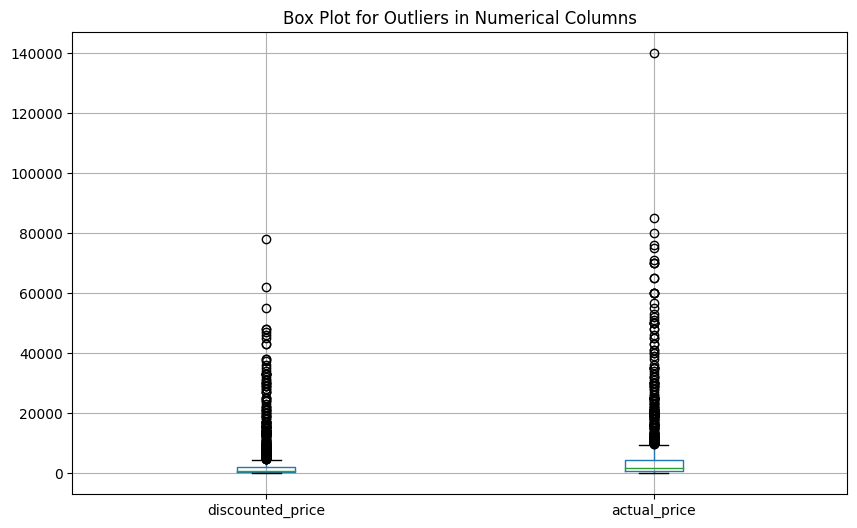

In [5]:
# Box Plot for Outliers
plt.figure(figsize=(10, 6))
data[['discounted_price', 'actual_price']].boxplot()
plt.title('Box Plot for Outliers in Numerical Columns')
plt.show()

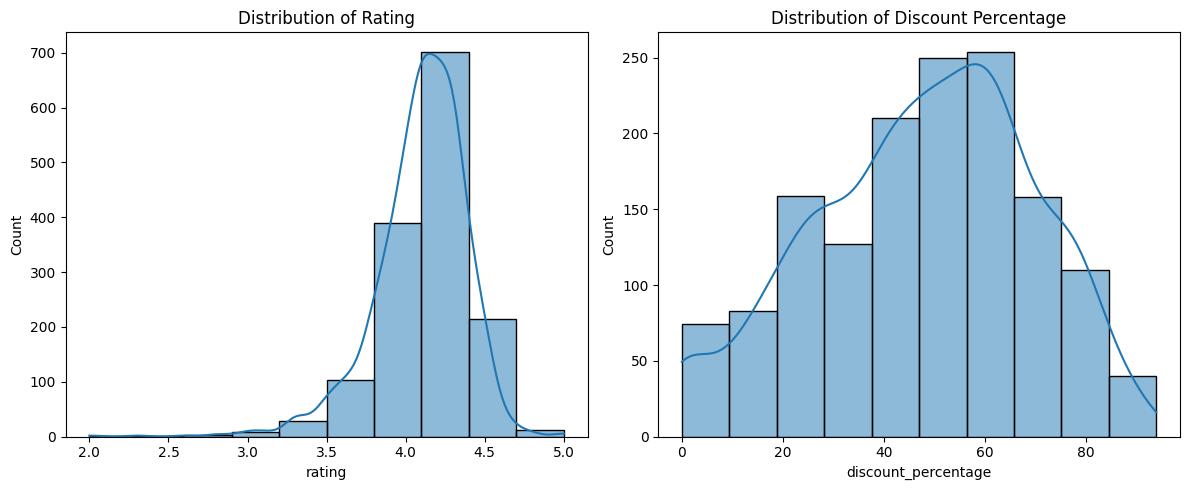

In [6]:
# Histogram for Rating and Discount Percentage
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['rating'], bins=10, kde=True)
plt.title('Distribution of Rating')
plt.subplot(1, 2, 2)
sns.histplot(data['discount_percentage'], bins=10, kde=True)
plt.title('Distribution of Discount Percentage')
plt.tight_layout()
plt.show()

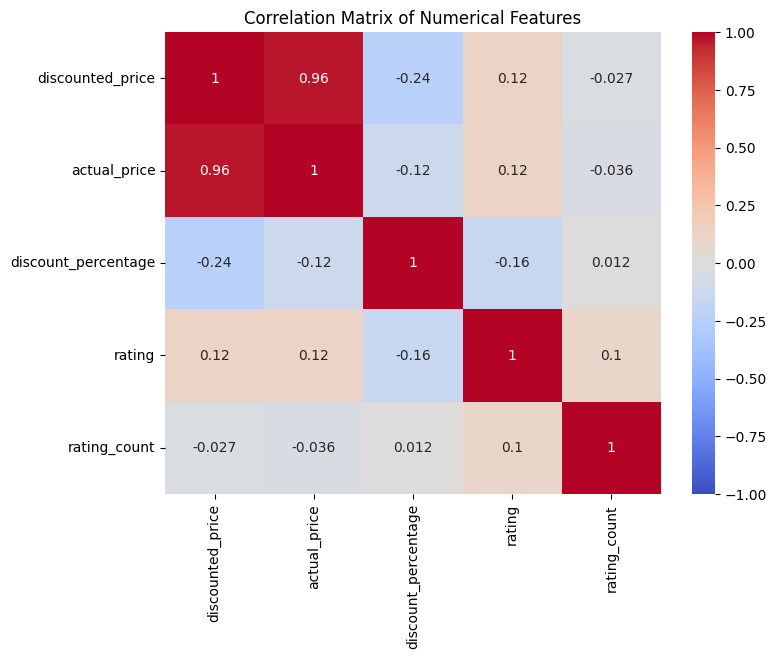

In [7]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].corr(), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

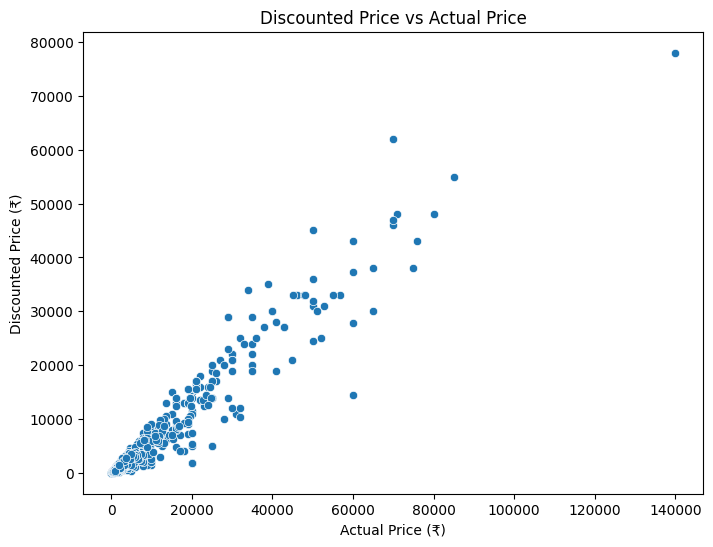

In [8]:
# Scatter Plot: Discounted Price vs Actual Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='actual_price', y='discounted_price', data=data)
plt.title('Discounted Price vs Actual Price')
plt.xlabel('Actual Price (₹)')
plt.ylabel('Discounted Price (₹)')
plt.show()

### Visualization Observations

* discounted_price and actual_price show some high outliers, likely due to variety of product lines and inclusion of expensive products.
* rating: Likely skewed towards higher values (4.0–4.4), with fewer products having ratings below 3.5.
* discount_percentage: Likely shows a spread between 20% and 90%, with a peak around 50–60%.
* Strong positive correlation expected between discounted_price and actual_price (since discounted price is derived from actual price).
* Weak or no correlation expected between rating and rating_count, as high ratings don't necessarily mean high rating counts.
* discounted_price vs. actual_price: Should show a linear relationship

# Business Recommendation
Based on the EDA of the Amazon sales dataset, several actionable insights and recommendations emerge for businesses operating in the e-commerce space, particularly those selling electronics and home appliances on platforms like Amazon:

Optimize Pricing and Discount Strategies:
* The strong positive correlation between actual_price and discounted_price (expected due to discounts being derived from actual prices) and the wide range of discount_percentage (22% to 90%) suggest that discounts significantly influence product pricing. Businesses should analyze competitors’ discount patterns within high-demand categories like USB cables and home appliances to offer competitive discounts (around the dataset’s mean of 52%) while maintaining profitability

Target High-Performing Categories:
* The dataset shows a dominance of products in the "Computers & Accessories" category, particularly USB cables, which also have high rating counts. Businesses should prioritize stocking and promoting products in this category, as they appear to have consistent demand.

Enhance Customer Feedback:
* Encourage more customer reviews for products with low rating_count to increase visibility, as products with higher rating counts tend to perform better in terms of perceived popularity.

# Data Limitations
* The absence of a temporal column limits direct time series analysis. Businesses should integrate timestamped data (e.g., sales or review dates) to enable forecasting models that capture seasonal trends or promotional impacts. Partnering with Amazon or third-party data providers could help acquire this data.
* Outliers in rating_count and pricing (e.g., ₹3499.77 for room heaters) suggest premium or high-demand products. Businesses should segment their product portfolio into budget, mid-range, and premium categories to tailor marketing strategies accordingly.

By implementing these strategies, businesses can enhance their competitive positioning, optimize pricing, and improve customer satisfaction, ultimately driving higher sales and profitability on e-commerce platforms.

# Conclusion
The Exploratory Data Analysis of the Amazon sales dataset reveals a robust dataset with numerical features like discounted_price, actual_price, discount_percentage, rating, and rating_count, alongside categorical features like category and product_name. The dataset’s strengths include no missing values, a diverse range of products, and clear relationships between pricing variables, making it suitable for regression analysis to predict prices or product popularity. However, the lack of an explicit temporal column poses a challenge for direct time series modeling, though rating_count can serve as a proxy for sales trends. Visualizations, including box plots, histograms, and correlation matrices, highlight outliers in pricing and rating counts, as well as strong correlations between actual and discounted prices. For businesses, the dataset offers valuable insights into pricing strategies, category performance, and customer feedback, enabling data-driven decisions to optimize product offerings and marketing efforts. To fully leverage this dataset for time series regression, incorporating temporal data would be a critical next step. Overall, the Amazon sales dataset provides a solid foundation for predictive modeling and strategic planning in the e-commerce sector.